# Employee Prediction

In [1]:
import pandas as pd
import numpy as np 
 
data = pd.read_csv(r'C:\Users\Administrator\Desktop\DATA\Python Test Data\Random data\employee_data.csv')
data_orig = data
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
#importing necessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use('ggplot')
import pandas_profiling
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = (12,8)

# Exploring

In [4]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [5]:
print(data.shape)

(14999, 10)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


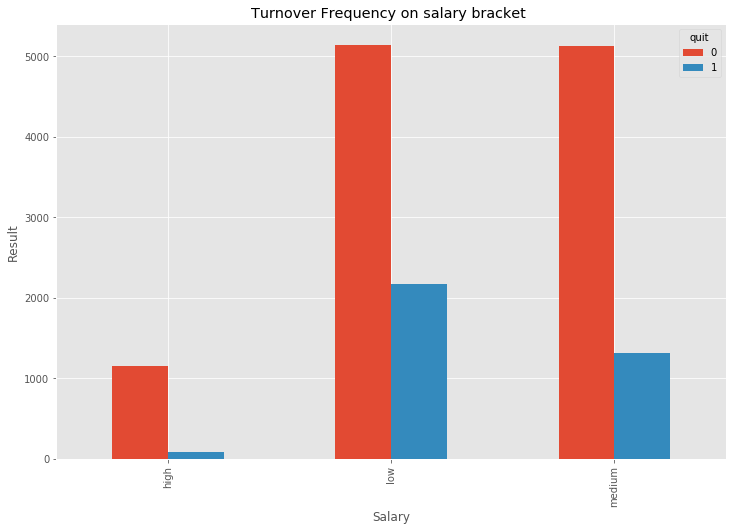

In [7]:
# figuring the categorical variables

pd.crosstab(data.salary , data.quit).plot(kind='bar')
plt.title('Turnover Frequency on salary bracket ')
plt.xlabel('Salary')
plt.ylabel('Result')
plt.show()

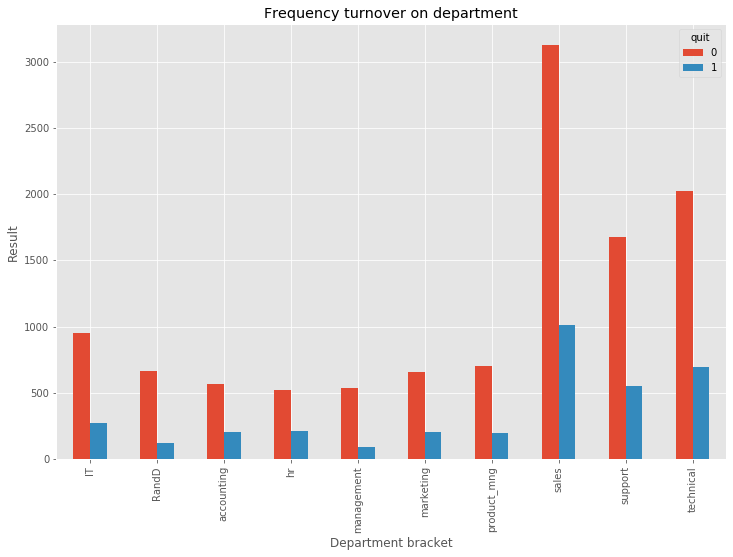

In [8]:
pd.crosstab(data.department , data.quit).plot(kind='bar')
plt.title('Frequency turnover on department')
plt.xlabel('Department bracket')
plt.ylabel('Result')
plt.show()

# Encoding Categorical

In [9]:
categorical_variables = ['department','salary']
for i in categorical_variables:
    categorical_list = 'i'+'_'+i
    categorical_list = pd.get_dummies(data[i] , prefix=i)
    data1 = data.join(categorical_list)
    data = data1

In [10]:
#printing list
print(list(data))

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit', 'promotion_last_5years', 'department', 'salary', 'department_IT', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_high', 'salary_low', 'salary_medium']


In [11]:
#dropping redundant columns
data.drop(columns=['department' , 'salary'] , axis=1 , inplace=True)

# Visualizing Class Imbalance

In [12]:
from yellowbrick.target import ClassBalance
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)            

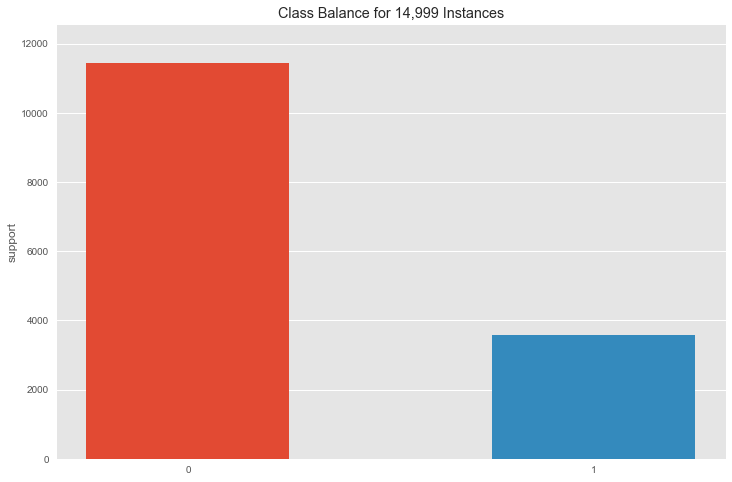

In [13]:
visualizer = ClassBalance(labes=['stayed','quit'])

visualizer.fit(data.quit)
visualizer.show()


In [14]:
# Storing values

X = data.loc[: , data.columns != 'quit']
y = data.quit

#creating train test split

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 ,random_state=1 , stratify=y)

# Modelling 

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [16]:
@interact

def plot_tree(criteria=['gini','entropy'],
             split = ['best','random'],
             depth=IntSlider(min=1 , max=30 , value=5 , continuous_update=False),
             min_split = IntSlider(min=1 , max=5 , value=2 , continuous_update=False),
             min_leaf = IntSlider(min=1 , max=5 , value=1 , continuous_update=False)):
    
    estimator = DecisionTreeClassifier(criterion=criteria,
                                      splitter= split,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf)
    
    estimator.fit(X_train , y_train)
    
    print('Decision Tree training accuracy {:.3f}'.format(accuracy_score(y_train , estimator.predict(X_train))))
    print('Decision Tree test accuracy {:.3f}'.format(accuracy_score(y_test , estimator.predict(X_test))))
    
    graph = Source(tree.export_graphviz(estimator,
                                       out_file=None,
                                       feature_names = X_train.columns,
                                       class_names = ['0','1'],
                                       filled = True))
    display(Image(data=graph.pipe(format = 'png')))
    return estimator

interactive(children=(Dropdown(description='criteria', options=('gini', 'entropy'), value='gini'), Dropdown(de…

In [17]:
@interact
def plot_tree_rf(crit=["gini", "entropy"],
                 bootstrap=["True", "False"],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = RandomForestClassifier(random_state=1,
                                       criterion=crit,
                                       bootstrap=bootstrap,
                                       n_estimators=forests,
                                       max_depth=depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf,
                                       n_jobs=-1,
                                      verbose=False).fit(X_train, y_train)

    print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    num_tree = estimator.estimators_[0]
    print('\nVisualizing Decision Tree:', 0)
    
    graph = Source(tree.export_graphviz(num_tree,
                                        out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['0', '1'],
                                        filled = True))
    
    display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Feature Importance


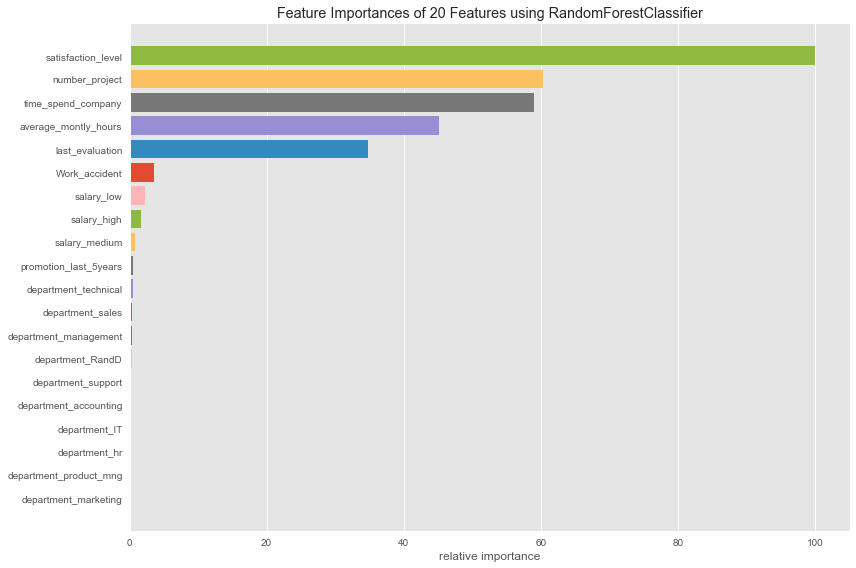

In [22]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize']=(12,8)

rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1,
                       verbose=False, warm_start=False)
visualiser = FeatureImportances(rf)
visualiser.fit(X_train,y_train)
visualiser.show()